In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("/Users/namanmuktha/Desktop/crewlabs/mh-prod/Tel & Ap Data/Ap_sort_Mbbs.csv")

In [16]:
df.head()

,RANK,NEET_ROLL_NO,SCORE,SX,CAT,LOC,PHASE,COLLEGE,EWS
0,1503,1206060037,680,M,BCD,AU,P1,"Siddhartha Medical College, Vijayawada",NO
1,2599,1209010031,671,F,OC,AU,P1,"Siddhartha Medical College, Vijayawada",NO
2,5738,1205060436,655,M,OC,AU,P1,"Siddhartha Medical College, Vijayawada",NO
3,8695,1205090412,644,M,OC,APNL,P1,"Siddhartha Medical College, Vijayawada",NO
4,11748,1205050763,635,F,OC,SVU,P1,"Siddhartha Medical College, Vijayawada",NO


In [17]:
df.shape

(7469, 9)

In [18]:
df["COLLEGE"].nunique()

37

In [19]:
import seaborn as sns

<Axes: xlabel='COLLEGE', ylabel='count'>

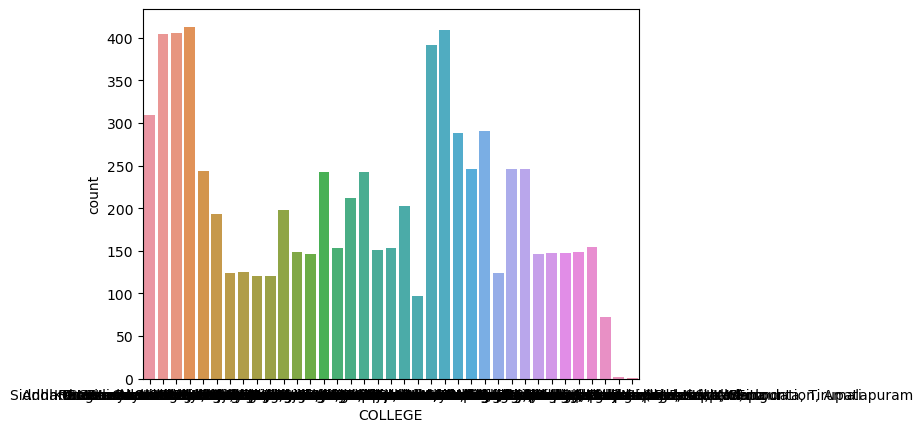

In [20]:
sns.countplot(x=df['COLLEGE'])

In [21]:
df.isna().sum()

RANK            0
NEET_ROLL_NO    0
SCORE           0
SX              0
CAT             0
LOC             0
PHASE           0
COLLEGE         0
EWS             0
dtype: int64

In [22]:
df=df.drop(['NEET_ROLL_NO','SCORE'],axis=1)

In [23]:
df.head()

,RANK,SX,CAT,LOC,PHASE,COLLEGE,EWS
0,1503,M,BCD,AU,P1,"Siddhartha Medical College, Vijayawada",NO
1,2599,F,OC,AU,P1,"Siddhartha Medical College, Vijayawada",NO
2,5738,M,OC,AU,P1,"Siddhartha Medical College, Vijayawada",NO
3,8695,M,OC,APNL,P1,"Siddhartha Medical College, Vijayawada",NO
4,11748,F,OC,SVU,P1,"Siddhartha Medical College, Vijayawada",NO


In [24]:
df.dtypes

RANK        int64
SX         object
CAT        object
LOC        object
PHASE      object
COLLEGE    object
EWS        object
dtype: object

In [25]:
df.nunique()

RANK       4114
SX            2
CAT          38
LOC          26
PHASE         6
COLLEGE      37
EWS           1
dtype: int64

In [26]:
df['PHASE'].unique()

array(['P1', 'P2', 'MopUp', 'MopUp1', 'NCCRound', 'NCC2'], dtype=object)

In [27]:
df=df.drop(['EWS'],axis=1)

In [28]:
df.head()

,RANK,SX,CAT,LOC,PHASE,COLLEGE
0,1503,M,BCD,AU,P1,"Siddhartha Medical College, Vijayawada"
1,2599,F,OC,AU,P1,"Siddhartha Medical College, Vijayawada"
2,5738,M,OC,AU,P1,"Siddhartha Medical College, Vijayawada"
3,8695,M,OC,APNL,P1,"Siddhartha Medical College, Vijayawada"
4,11748,F,OC,SVU,P1,"Siddhartha Medical College, Vijayawada"


In [29]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['COLLEGE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['COLLEGE'] = encoded_values

In [30]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['SX']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['SX'] = encoded_values

In [31]:
one_hot_encoded = pd.get_dummies(df['CAT'], prefix='CAT')

# Drop the original 'CAT' column from the DataFrame
df = df.drop('CAT', axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)


In [32]:
df.head()

,RANK,SX,LOC,PHASE,COLLEGE,CAT_.,CAT_AAHLADITA,CAT_ABINAYA,CAT_AFEEF,CAT_BCA,...,CAT_SA,CAT_SAI,CAT_SALEEL,CAT_SANTOS,CAT_SC,CAT_SHAIK,CAT_SIVANI,CAT_ST,CAT_V,CAT_VIDYA
0,1503,1,AU,P1,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2599,0,AU,P1,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5738,1,AU,P1,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8695,1,APNL,P1,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11748,0,SVU,P1,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['LOC']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_loc = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['LOC'] = encoded_values

In [34]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['PHASE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['PHASE'] = encoded_values

In [35]:
df.head()

,RANK,SX,LOC,PHASE,COLLEGE,CAT_.,CAT_AAHLADITA,CAT_ABINAYA,CAT_AFEEF,CAT_BCA,...,CAT_SA,CAT_SAI,CAT_SALEEL,CAT_SANTOS,CAT_SC,CAT_SHAIK,CAT_SIVANI,CAT_ST,CAT_V,CAT_VIDYA
0,1503,1,3,4,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2599,0,3,4,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5738,1,3,4,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8695,1,2,4,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11748,0,21,4,32,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='COLLEGE', ylabel='count'>

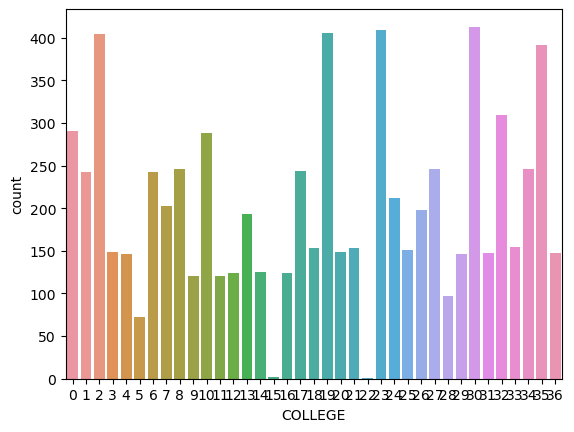

In [36]:
sns.countplot(x=df['COLLEGE'])

In [37]:
for i in df["COLLEGE"].sort_values().unique():
    print(i)
    x=df[df["COLLEGE"]==i].count()
    print(x["COLLEGE"])

0
291
1
243
2
404
3
149
4
146
5
72
6
242
7
203
8
246
9
121
10
288
11
121
12
124
13
193
14
125
15
2
16
124
17
244
18
153
19
406
20
149
21
153
22
1
23
409
24
212
25
151
26
198
27
246
28
97
29
146
30
413
31
148
32
310
33
154
34
246
35
392
36
147


In [38]:
for i in df["COLLEGE"].sort_values().unique():
    print(i)
    x=df[df["COLLEGE"]==i].count()
    print(x["COLLEGE"])

0
291
1
243
2
404
3
149
4
146
5
72
6
242
7
203
8
246
9
121
10
288
11
121
12
124
13
193
14
125
15
2
16
124
17
244
18
153
19
406
20
149
21
153
22
1
23
409
24
212
25
151
26
198
27
246
28
97
29
146
30
413
31
148
32
310
33
154
34
246
35
392
36
147


In [39]:
label_mapping
#34
#22
#15

{'ACSR Government Medical College, Nellore': 0,
 'Alluri Seetharama Raju Academy of Medical Sciences, Eluru': 1,
 'Andhra Medical College, Visakhapatnam': 2,
 'Apollo Institute of Medical Sciences and Research, Chittoor': 3,
 'Dr. Pinnamaneni Siddhartha Institute of Medical Sciences, Gannavaram': 4,
 'Fathima Institute of Medical Sciences, Kadapa': 5,
 'GSL Medical College, Rajamahendravaram': 6,
 'Gayatri Vidya Parishad Inst. of Health Care and Medical Technology, Visakhapatnam': 7,
 'Government Medical College, Anantapur': 8,
 'Government Medical College, Eluru': 9,
 'Government Medical College, Kadapa': 10,
 'Government Medical College, Machilipatnam': 11,
 'Government Medical College, Nandyal': 12,
 'Government Medical College, Ongole': 13,
 'Government Medical College, Rajamahendravaram': 14,
 'Government Medical College, Srikakulam': 15,
 'Government Medical College, Vizianagaram': 16,
 'Government Medical College,Srikakulam': 17,
 'Great Eastern Medical School and Hospital , Sri

In [40]:
df = df[~df['COLLEGE'].isin([34, 22, 15])]

<Axes: xlabel='COLLEGE', ylabel='count'>

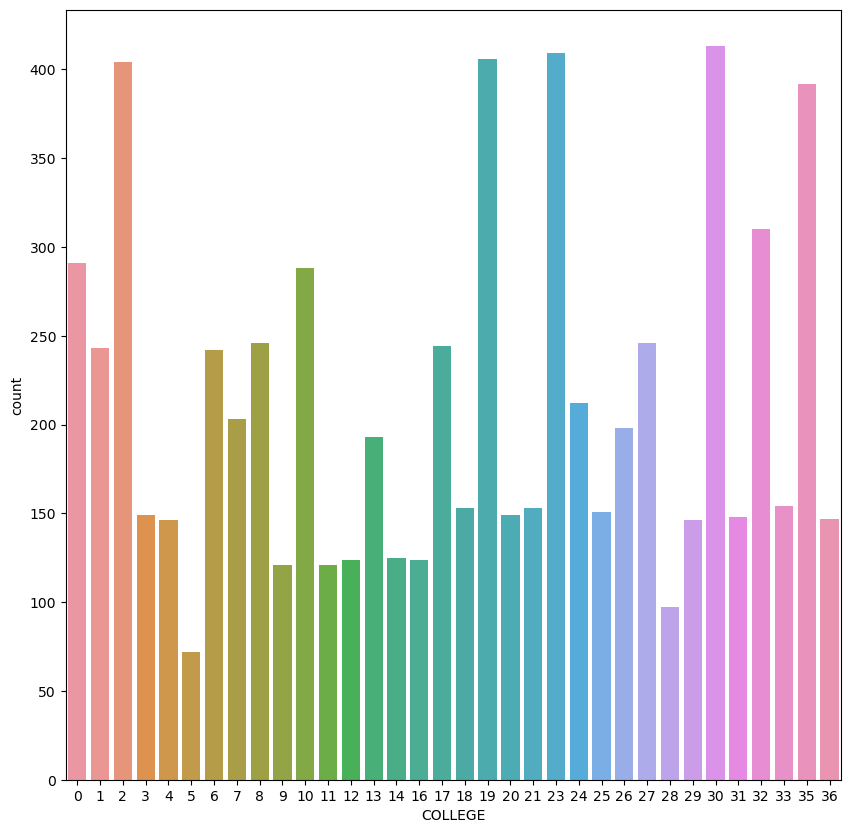

In [41]:
plt.figure(figsize=(10, 10))
sns.countplot(x=df['COLLEGE'])

In [42]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [43]:
X=df.drop(['COLLEGE'],axis=1)
y=df['COLLEGE']

In [44]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [45]:
df_updated=X_resampled

In [46]:
df_updated['COLLEGE']=y_resampled

In [47]:
df_updated.head()

,RANK,SX,LOC,PHASE,CAT_.,CAT_AAHLADITA,CAT_ABINAYA,CAT_AFEEF,CAT_BCA,CAT_BCB,...,CAT_SAI,CAT_SALEEL,CAT_SANTOS,CAT_SC,CAT_SHAIK,CAT_SIVANI,CAT_ST,CAT_V,CAT_VIDYA,COLLEGE
0,1503,1,3,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
1,2599,0,3,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
2,5738,1,3,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
3,8695,1,2,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
4,11748,0,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32


<Axes: xlabel='COLLEGE', ylabel='count'>

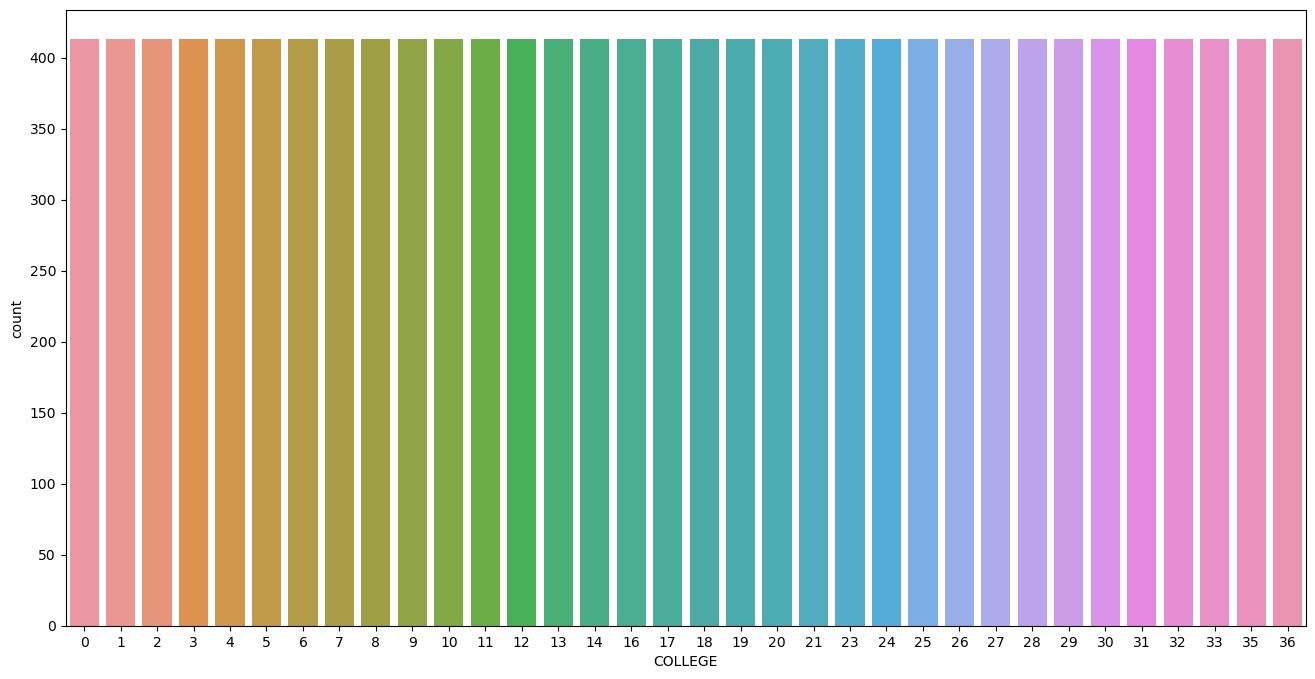

In [48]:
plt.figure(figsize=(16, 8))
sns.countplot(x=df_updated['COLLEGE'])

In [49]:
df_updated.head()

,RANK,SX,LOC,PHASE,CAT_.,CAT_AAHLADITA,CAT_ABINAYA,CAT_AFEEF,CAT_BCA,CAT_BCB,...,CAT_SAI,CAT_SALEEL,CAT_SANTOS,CAT_SC,CAT_SHAIK,CAT_SIVANI,CAT_ST,CAT_V,CAT_VIDYA,COLLEGE
0,1503,1,3,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
1,2599,0,3,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
2,5738,1,3,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
3,8695,1,2,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32
4,11748,0,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,32


In [50]:
df_updated.shape

(14042, 43)

In [51]:
df_updated["RANK"].describe()

count     14042.000000
mean      81699.752172
std       47320.561522
min        1242.000000
25%       46329.250000
50%       72177.500000
75%      108240.000000
max      871674.000000
Name: RANK, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df_updated.drop(["COLLEGE"],axis=1),df_updated["COLLEGE"],test_size=0.2,random_state=231)

In [53]:
X_train.head()

,RANK,SX,LOC,PHASE,CAT_.,CAT_AAHLADITA,CAT_ABINAYA,CAT_AFEEF,CAT_BCA,CAT_BCB,...,CAT_SA,CAT_SAI,CAT_SALEEL,CAT_SANTOS,CAT_SC,CAT_SHAIK,CAT_SIVANI,CAT_ST,CAT_V,CAT_VIDYA
3416,62039,0,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1187,77583,0,3,4,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7523,56157,1,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,201363,1,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6215,24484,1,15,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
y_train.head()

3416    33
1187    11
7523     3
3476    33
6215     8
Name: COLLEGE, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p=rfc.predict(X_test)
print(accuracy_score(y_p,y_test)*100)
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

90.49483802064792
[[74  0  0 ...  0  3  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 64 ...  0  1  0]
 ...
 [ 0  0  0 ... 84  1  9]
 [ 2  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 70]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        84
           1       0.89      0.97      0.93        73
           2       0.85      0.81      0.83        79
           3       0.97      0.93      0.95        98
           4       0.99      0.88      0.93        83
           5       1.00      1.00      1.00        85
           6       0.81      0.90      0.85        70
           7       0.91      0.96      0.93        90
           8       0.96      0.90      0.92        96
           9       1.00      0.93      0.96        84
          10       0.87      0.86      0.87        94
          11       1.00      0.99      0.99        78
          12       1.00      0.98      0.99        82
          13       0.90      0.89      0.90        82
          14   

In [56]:
y_p

array([13, 12, 26, ...,  3,  0, 33])

In [57]:
y_test

10043    13
9782     12
1276     26
2840      0
7832      4
         ..
2574     10
3636      2
6677     29
6456      0
13506    33
Name: COLLEGE, Length: 2809, dtype: int64

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.9170523317906728
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        84
           1       0.89      1.00      0.94        71
           2       0.83      0.82      0.82        76
           3       0.97      0.90      0.93       101
           4       0.99      0.89      0.94        82
           5       1.00      1.00      1.00        85
           6       0.83      0.93      0.88        70
           7       0.91      0.96      0.93        90
           8       0.94      0.89      0.91        96
           9       1.00      0.84      0.91        93
          10       0.89      0.92      0.91        90
          11       1.00      1.00      1.00        77
          12       1.00      0.99      0.99        81
          13       0.91      0.86      0.89        86
          14       0.96      0.96      0.96        81
          16       1.00      0.95      0.97        78
          17       0.89      0.93      0.91        84
        

In [99]:
y_p

array([10,  6,  3, ..., 27, 35, 31])

In [100]:
y_test

6412     10
8916      6
8240      3
14828    37
9483      9
         ..
2330     36
7584      7
12990    27
14432    35
3420     31
Name: COLLEGE, Length: 2968, dtype: int64

In [101]:
X_test

,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
6412,63318,0,1,0,True,False,False,False,False,False,False,False
8916,60905,0,1,0,False,False,False,True,False,False,False,False
8240,145730,1,5,0,False,False,False,False,False,False,True,False
14828,106186,1,5,0,False,True,False,False,False,False,False,False
9483,45954,1,1,0,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2330,59916,1,5,0,False,False,False,False,False,False,True,False
7584,156858,0,1,1,False,False,False,False,False,False,True,False
12990,84758,1,5,0,False,False,False,False,True,False,False,False
14432,62094,0,5,1,False,False,False,False,False,True,False,False


In [102]:
p

NameError: name 'p' is not defined

In [ ]:
y_test

6412     10
8916      6
8240      3
14828    37
9483      9
         ..
2330     36
7584      7
12990    27
14432    35
3420     31
Name: COLLEGE, Length: 2968, dtype: int64

In [59]:
X_train

,RANK,SX,LOC,PHASE,CAT_.,CAT_AAHLADITA,CAT_ABINAYA,CAT_AFEEF,CAT_BCA,CAT_BCB,...,CAT_SA,CAT_SAI,CAT_SALEEL,CAT_SANTOS,CAT_SC,CAT_SHAIK,CAT_SIVANI,CAT_ST,CAT_V,CAT_VIDYA
3416,62039,0,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1187,77583,0,3,4,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7523,56157,1,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,201363,1,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6215,24484,1,15,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,73508,1,3,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12998,57521,1,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7947,83857,1,3,4,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6601,84108,1,21,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
